Root Mean Squared Error: 259.4806680832404
Mean Absolute Error: 127.27199505652949
Mean Squared Logarithmic Error: 4.375979388777061
       Actual  Predicted
0         0.0  50.496746
1         0.0  50.496746
2         0.0  50.496746
3         0.0  50.496746
4         0.0  50.496746
...       ...        ...
21071     0.0  55.378416
21072     0.0  55.378416
21073     0.0  55.378416
21074     0.0  55.378416
21075     0.0  55.378416

[21076 rows x 2 columns]


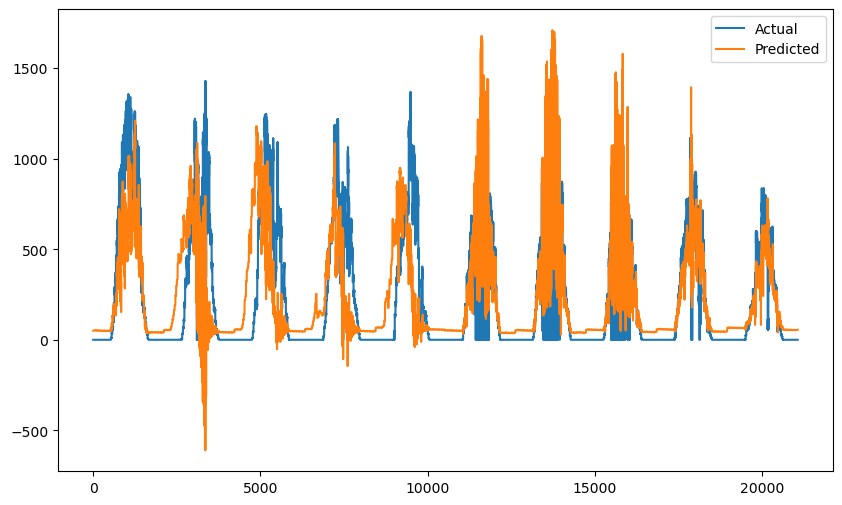

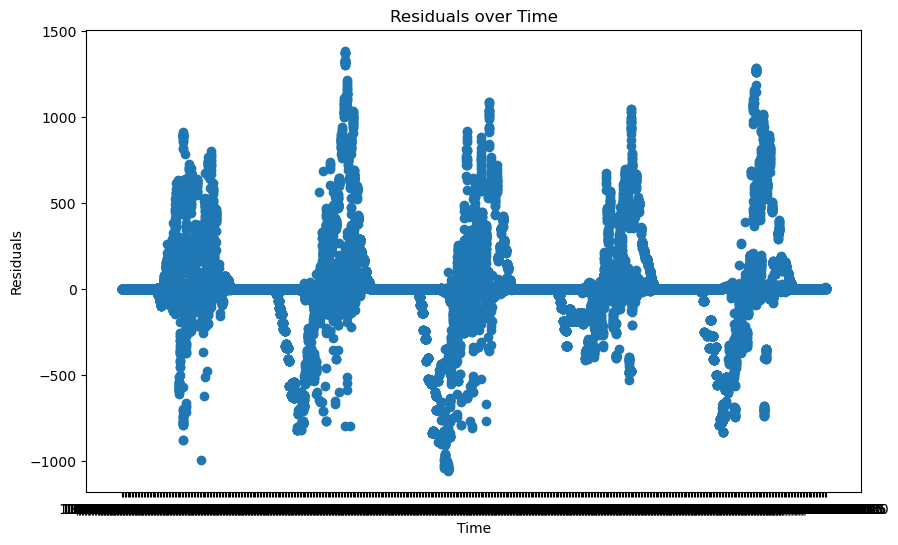

Building model...
Making predictions...
Root Mean Squared Error: 259.4806680832404
Mean Absolute Error: 127.27199505652949
Mean Squared Logarithmic Error: 4.375979388777061
Printing Comparison
       Actual  Predicted
0         0.0  50.496746
1         0.0  50.496746
2         0.0  50.496746
3         0.0  50.496746
4         0.0  50.496746
...       ...        ...
21071     0.0  55.378416
21072     0.0  55.378416
21073     0.0  55.378416
21074     0.0  55.378416
21075     0.0  55.378416

[21076 rows x 2 columns]
Comparing results...


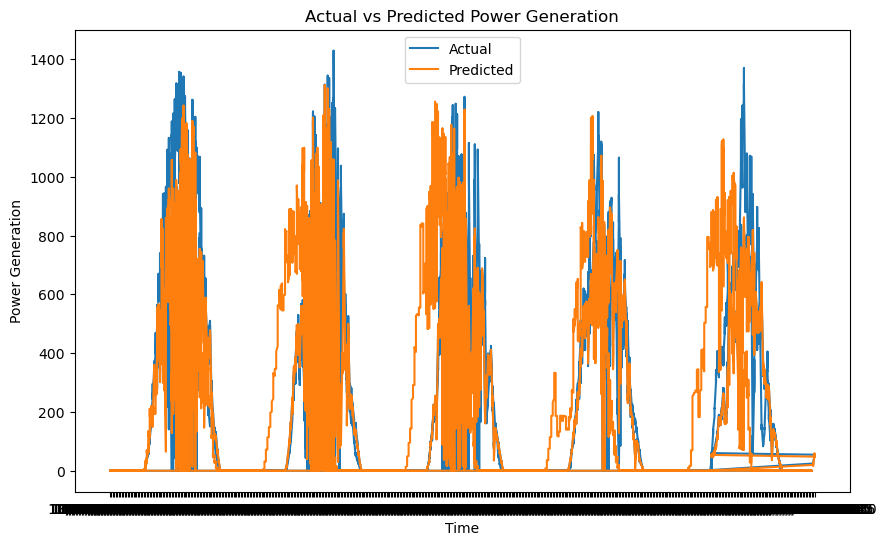

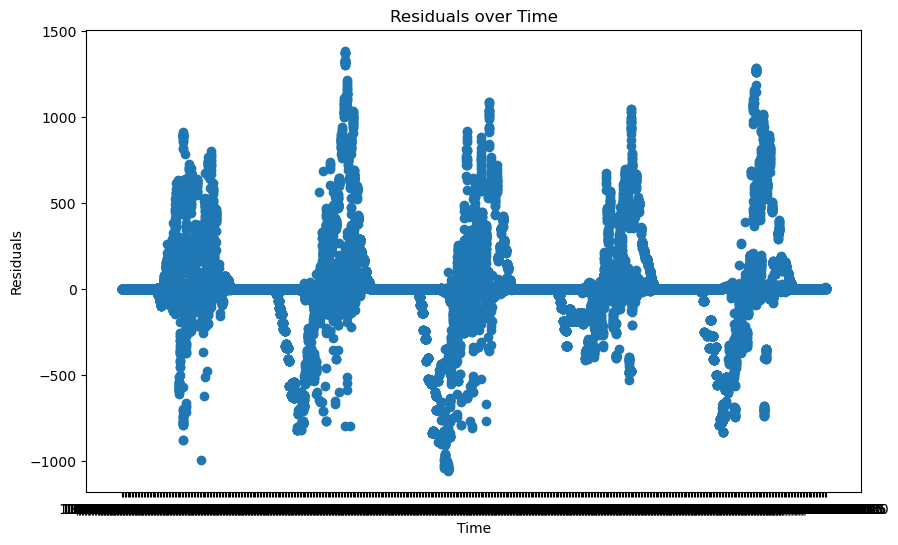

Building model...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Making predictions...
Root Mean Squared Error: 260.81737266611174
Mean Absolute Error: 125.97784941411251
Mean Squared Logarithmic Error: 4.196805475579928
Printing Comparison
       Actual  Predicted
0         0.0  50.496746
1         0.0  50.496746
2         0.0  50.496746
3         0.0  50.496746
4         0.0  50.496746
...       ...        ...
21071     0.0  55.378416
21072     0.0  55.378416
21073     0.0  55.378416
21074     0.0  55.378416
21075     0.0  55.378416

[21076 rows x 2 columns]
Comparing results...


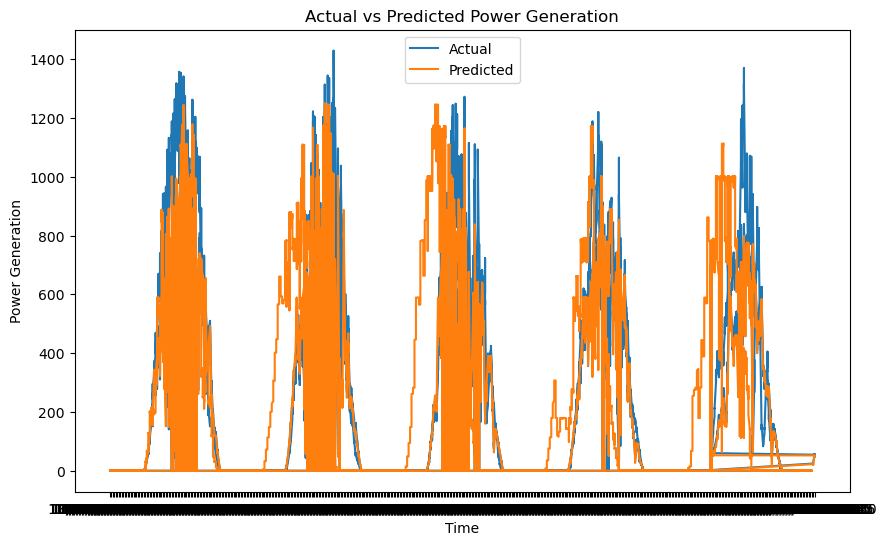

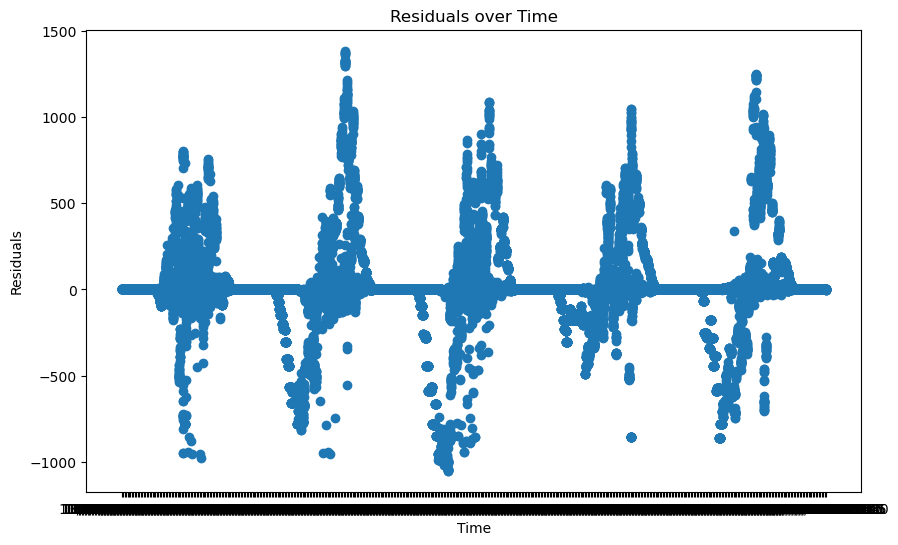

In [9]:

"""
    -- Available features
    
    Time
    Hour
    QuarterHour
    Hour_Sin
    Hour_Cos
    PowerGeneration
    PowerGenerationTwoHourMean
    PowerGenerationOneHourLag
    PowerGenerationOneDayChange
    DailyYield
    DailyYieldSameTimeYesterdayDiff
    DailyYieldRateOfChange
    AverageDailyYieldSummary
    DependentTemperature
    TemperatureIrradiation
    TemperatureTimeOfDay
"""

#
# Linear Regression Model Evaluation
#

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('training_data.csv')

# Define the features (inputs)

"""
-- Test 1 - Basic Features
features = ['TimeInt', 'QuarterHour', 'DailyYield', 'DependentTemperature', 'TemperatureIrradiation', 'TemperatureTimeOfDay']

-- Test 2 - General
features = ['TimeInt', 'QuarterHour', 'DailyYieldSameTimeYesterdayDiff',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']

-- Test 3 - General
features = ['QuarterHour', 'DailyYieldSameTimeYesterdayDiff',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']
"""

# Define features
features = ['TimeInt', 'QuarterHour', 'DailyYieldSameTimeYesterdayDiff',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']

# Define the target variable (output)
target = ['PowerGeneration']

# Separate the data into inputs (X) and output (y)
X = df[features]
y = df[target]

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the root mean squared error of the model on the test data
rmse = mean_squared_error(test_data[output_column], predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Print the mean absolute error of the model on the test data
mae = mean_absolute_error(test_data[output_column], predictions)
print("Mean Absolute Error:", mae)

# Print the mean squared logarithmic error of the model on the test data
msle = mean_squared_log_error(test_data[output_column], predictions)
print("Mean Squared Logarithmic Error:", msle)

# Load the test dataset
df_new = pd.read_csv('test_data.csv')

# Separate the data into inputs (X_new) and output (y_new)
X_new = df_new[features]
y_new = df_new[target]

# Use the model to make predictions
y_new_pred = model.predict(X_new)

# Compare the predicted and actual PowerGeneration
comparison = pd.DataFrame({'Actual': y_new.values.flatten(), 'Predicted': y_new_pred.flatten()})
print(comparison)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'], label='Actual')
plt.plot(comparison['Predicted'], label='Predicted')
plt.legend()
plt.show()

# Plot residuals
residuals = test_data[output_column] - predictions
plt.figure(figsize=(10,6))
plt.scatter(test_data['Time'], residuals)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

    
#
# Initial RandomForestRegressor Evaluation
#

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np

# Load the training data
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

# Specify the input and output columns
input_columns =['TimeInt', 'QuarterHour', 'HourSIN', 'HourCOS', 'DailyYieldSameTimeYesterdayDiff',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']

output_column = "PowerGeneration"

# Train a Random Forest model
print("Building model...")
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(train_data[input_columns], train_data[output_column])

# Make predictions on the test data
print("Making predictions...")
predictions = model.predict(test_data[input_columns])

# Print the root mean squared error of the model on the test data
rmse = mean_squared_error(test_data[output_column], predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Print the mean absolute error of the model on the test data
mae = mean_absolute_error(test_data[output_column], predictions)
print("Mean Absolute Error:", mae)

# Print the mean squared logarithmic error of the model on the test data
msle = mean_squared_log_error(test_data[output_column], predictions)
print("Mean Squared Logarithmic Error:", msle)

print("Printing Comparison")
comparison = pd.DataFrame({'Actual': y_new.values.flatten(), 'Predicted': y_new_pred.flatten()})
print(comparison)

# Compare actual and predicted power generation
print("Comparing results...")
plt.figure(figsize=(10,6))
plt.plot(test_data['Time'], test_data[output_column], label='Actual')
plt.plot(test_data['Time'], predictions, label='Predicted')
plt.title('Actual vs Predicted Power Generation')
plt.xlabel('Time')
plt.ylabel('Power Generation')
plt.legend()
plt.show()

# Plot residuals
residuals = test_data[output_column] - predictions
plt.figure(figsize=(10,6))
plt.scatter(test_data['Time'], residuals)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


#
# Initial RandomForestRegressor Evaluation
# Hyuperparameter Optimisation usiong GridSearchCV scikit-learn
#

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np

# Load the training data
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

# Specify the input and output columns

"""
input_columns =['TimeInt', 'QuarterHour', 'HourSIN', 'HourCOS', 'DailyYieldSameTimeYesterdayDiff', 'DailyYieldRateOfChange', 'AverageDailyYieldSummary',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']
"""

input_columns =['TimeInt', 'QuarterHour', 'DailyYieldSameTimeYesterdayDiff', 'DailyYieldRateOfChange', 'AverageDailyYieldSummary',
            'AverageDailyYieldSummary', 'DependentTemperature', 
            'TemperatureIrradiation', 'TemperatureTimeOfDay']


output_column = "PowerGeneration"

# Train a Random Forest model
print("Building model...")
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Define the hyperparameters to tune
"""
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'] # Number of features to consider when looking for the best split
}
"""

param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'bootstrap': [True]  # Number of features to consider when looking for the best split
}

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=2)

X_train = train_data[input_columns]
y_train = train_data[output_column]

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
print("Making predictions...")
predictions = best_model.predict(test_data[input_columns])

# Print the root mean squared error of the model on the test data
rmse = mean_squared_error(test_data[output_column], predictions, squared=False)
print("Root Mean Squared Error:", rmse)

# Print the mean absolute error of the model on the test data
mae = mean_absolute_error(test_data[output_column], predictions)
print("Mean Absolute Error:", mae)

# Print the mean squared logarithmic error of the model on the test data
msle = mean_squared_log_error(test_data[output_column], predictions)
print("Mean Squared Logarithmic Error:", msle)

print("Printing Comparison")
comparison = pd.DataFrame({'Actual': y_new.values.flatten(), 'Predicted': y_new_pred.flatten()})
print(comparison)

# Compare actual and predicted power generation
print("Comparing results...")
plt.figure(figsize=(10,6))
plt.plot(test_data['Time'], test_data[output_column], label='Actual')
plt.plot(test_data['Time'], predictions, label='Predicted')
plt.title('Actual vs Predicted Power Generation')
plt.xlabel('Time')
plt.ylabel('Power Generation')
plt.legend()
plt.show()

# Plot residuals
residuals = test_data[output_column] - predictions
plt.figure(figsize=(10,6))
plt.scatter(test_data['Time'], residuals)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()
